# Importing packages

In [2]:
#importing packages
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn import linear_model
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Reading Excel file saved in hard drive

In [3]:
#reading the file
df = pd.read_excel("fisher_update.xlsx")
df

,DATE,P,R
0,1969-12-01,17.1,5.65
1,1970-03-01,17.3,7.15
2,1970-06-01,17.5,8.70
3,1970-09-01,17.6,6.35
4,1970-12-01,17.9,6.50
...,...,...,...
166,2011-06-01,178.3,4.99
167,2011-09-01,179.4,4.81
168,2011-12-01,179.4,4.51
169,2012-03-01,179.5,4.44


# Calculating annual inflation from quarterly CPI 

In [4]:
#computing the inflation rate
df['INF'] = 400*np.log(df['P']/df['P'].shift(1))
df.head()

,DATE,P,R,INF
0,1969-12-01,17.1,5.65,NaN
1,1970-03-01,17.3,7.15,4.651215
2,1970-06-01,17.5,8.70,4.597752
3,1970-09-01,17.6,6.35,2.279208
4,1970-12-01,17.9,6.50,6.760724


In [5]:
df.tail()

,DATE,P,R,INF
166,2011-06-01,178.3,4.99,3.605658
167,2011-09-01,179.4,4.81,2.460170
168,2011-12-01,179.4,4.51,0.000000
169,2012-03-01,179.5,4.44,0.222903
170,2012-06-01,180.4,3.49,2.000560


# Selecting sample data from row 57:Qtr 1 1984 to row 170: Qtr 2012

In [6]:
#Selecting the sample from
dta =df.iloc[57:170]
dta


,DATE,P,R,INF
57,1984-03-01,65.2,13.77,-1.836269
58,1984-06-01,65.4,12.81,1.225116
59,1984-09-01,66.2,10.53,4.863282
60,1984-12-01,67.2,12.34,5.997114
61,1985-03-01,68.1,15.29,5.321586
...,...,...,...,...
165,2011-03-01,176.7,4.92,6.159232
166,2011-06-01,178.3,4.99,3.605658
167,2011-09-01,179.4,4.81,2.460170
168,2011-12-01,179.4,4.51,0.000000


# Plotting the time series: Inflation 

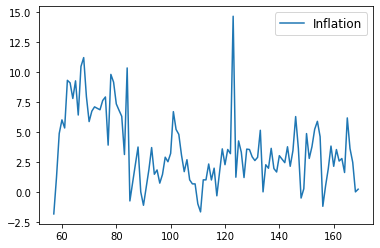

In [7]:
#plotting the series
plt.plot(dta['INF'],label='Inflation')
plt.legend(loc='best', fontsize='large')
plt.show()

In [8]:
dt = dta['INF'].dropna()
dt

57    -1.836269
58     1.225116
59     4.863282
60     5.997114
61     5.321586
         ...   
165    6.159232
166    3.605658
167    2.460170
168    0.000000
169    0.222903
Name: INF, Length: 113, dtype: float64

# ADF test of stationarity and unit root

In [9]:
#ADF Test under (i) Constant (no linear trend)
X = dt.values
result = adfuller(X, maxlag=None, regression='c', autolag='BIC', store=False, regresults=False)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
	print('\t%s:%.3f'%(key,value))
if result[0] < result [4] ["1%"]:
	print("Reject Ho_ Time Series is then stationary")
else: 
	print("Failed to Reject Ho_ Time Series is then non-stationary")

ADF Statistic: -3.820525408886768
n_lags: 0.0027041579302507688
p-value: 0.0027041579302507688
	1%:-3.491
	5%:-2.888
	10%:-2.581
Reject Ho_ Time Series is then stationary


In [10]:
# ADF test under (ii) Constant , Linear trend
X = dt.values
result = adfuller(X, maxlag=None, regression='ct', autolag='BIC', store=False, regresults=False)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
	print('\t%s:%.3f'%(key,value))
if result[0] < result [4] ["1%"]:
	print("Reject Ho_ Time Series is then stationary")
else: 
	print("Failed to Reject Ho_ Time Series is then non-stationary")

ADF Statistic: -4.707778614704212
n_lags: 0.0006768517326375754
p-value: 0.0006768517326375754
	1%:-4.043
	5%:-3.451
	10%:-3.151
Reject Ho_ Time Series is then stationary


# Correlogram: ACF and PACF

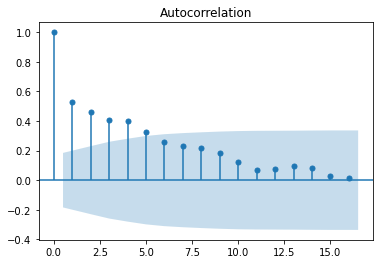

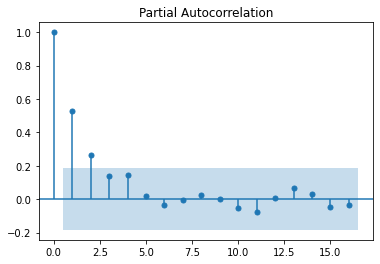

In [11]:
#running ACF and PACF
sm.graphics.tsa.plot_acf(dt.values.squeeze(),lags=16)
sm.graphics.tsa.plot_pacf(dt.values.squeeze(),lags=16)
plt.show()

In [12]:
# Generating the Q tables
import numpy as np
r,q,p = sm.tsa.acf(dt.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.526177   32.123408  1.446835e-08
2.0   0.461362   57.042746  4.105113e-13
3.0   0.405887   76.505017  1.723856e-16
4.0   0.398961   95.481302  9.003058e-20
5.0   0.328190  108.441254  8.746813e-22
6.0   0.260200  116.663817  8.174178e-23
7.0   0.228314  123.054314  1.769702e-23
8.0   0.215547  128.804379  5.005157e-24
9.0   0.182584  132.969880  2.903758e-24
10.0  0.124870  134.937112  4.582456e-24
11.0  0.070530  135.570871  1.293531e-23
12.0  0.073664  136.269055  3.386720e-23
13.0  0.095310  137.449513  6.819758e-23
14.0  0.080457  138.299210  1.544904e-22
15.0  0.031527  138.431012  4.692586e-22
16.0  0.015339  138.462534  1.440337e-21
17.0  0.073788  139.199540  3.120838e-21
18.0 -0.005333  139.203430  9.118899e-21
19.0  0.073269  139.945566  1.869803e-20
20.0  0.097139  141.264071  2.913081e-20
21.0  0.030206  141.392947  7.472463e-20
22.0  0.035012  141.568003  1.834430e-19
23.0 -0.040731  

C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


# Auto ARIMA

In [13]:
import statsmodels.tsa.api as smt
result = smt.arma_order_select_ic(dt,ic= ['aic','bic'], trend ='nc')
print(result.aic_min_order)
print(result.bic_min_order)

C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

(1, 1)
(1, 1)


C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#ARMA(1,1)

In [14]:
arima=ARIMA(dt.values,exog=None, order=(1, 0, 1), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=True)
results = arima.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  113
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -261.473
Date:                Thu, 05 Aug 2021   AIC                            530.945
Time:                        22:12:19   BIC                            541.855
Sample:                             0   HQIC                           535.372
                                - 113   Scale                            5.959
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3187      0.831      3.995      0.000       1.690       4.947
ar.L1          0.8748      0.068     12.806      0.000       0.741       1.009
ma.L1         -0.5134      0.099     -5.172      0.0

#ARMA(2,0)

In [15]:
arima_1=ARIMA(dt.values,exog=None, order=(2, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=True)
results_1 = arima_1.fit()
print(results_1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  113
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -262.721
Date:                Thu, 05 Aug 2021   AIC                            533.442
Time:                        22:12:19   BIC                            544.352
Sample:                             0   HQIC                           537.869
                                - 113   Scale                            6.096
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3784      0.701      4.820      0.000       2.005       4.752
ar.L1          0.4007      0.061      6.555      0.000       0.281       0.520
ar.L2          0.2691      0.093      2.893      0.0

In [16]:
arima_2=ARIMA(dt.values,exog=None, order=(1, 0, 2), seasonal_order=(0, 0, 0, 0), concentrate_scale=True,trend=None, enforce_stationarity=True, enforce_invertibility=True,)
results_2 = arima_2.fit()
print(results_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  113
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -261.428
Date:                Thu, 05 Aug 2021   AIC                            532.855
Time:                        22:12:19   BIC                            546.492
Sample:                             0   HQIC                           538.389
                                - 113   Scale                            5.954
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3129      0.824      4.021      0.000       1.698       4.928
ar.L1          0.8670      0.076     11.333      0.000       0.717       1.017
ma.L1         -0.5203      0.103     -5.047      0.0

#ARMA(2,2)

In [17]:
arima_3=ARIMA(dt.values,exog=None, order=(2, 0, 2), seasonal_order=(0, 0, 0, 0), concentrate_scale=True,trend=None, enforce_stationarity=True, enforce_invertibility=True)
results_3 = arima_3.fit()
print(results_3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  113
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -261.005
Date:                Thu, 05 Aug 2021   AIC                            534.010
Time:                        22:12:19   BIC                            550.375
Sample:                             0   HQIC                           540.651
                                - 113   Scale                            5.904
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2844      0.738      4.449      0.000       1.838       4.731
ar.L1          1.7513      0.331      5.287      0.000       1.102       2.401
ar.L2         -0.7879      0.274     -2.872      0.0

#ARMA (0,2)

In [18]:
arima_4=ARIMA(dt.values,exog=None, order=(0, 0, 2), seasonal_order=(0, 0, 0, 0), concentrate_scale=True,trend=None, enforce_stationarity=True, enforce_invertibility=True, )
results_4 = arima_4.fit()
print(results_4.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  113
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -268.884
Date:                Thu, 05 Aug 2021   AIC                            545.769
Time:                        22:12:19   BIC                            556.678
Sample:                             0   HQIC                           550.196
                                - 113   Scale                            6.812
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5175      0.429      8.193      0.000       2.676       4.359
ma.L1          0.4118      0.070      5.911      0.000       0.275       0.548
ma.L2          0.2778      0.128      2.171      0.0

In [19]:
name= ['ARMA_1_1','ARMA_2_0','ARMA_1_2','ARMA_2_2','ARMA_0_2']
aic =[results.aic,results_1.aic, results_2.aic,results_3.aic,results_4.aic]
ret= (name,aic)
ret

(['ARMA_1_1', 'ARMA_2_0', 'ARMA_1_2', 'ARMA_2_2', 'ARMA_0_2'],
 [530.9451650125998,
  533.4422760944162,
  532.8552441569482,
  534.0102545166149,
  545.7687072920193])

In [20]:
name= ['ARMA_1_1','ARMA_2_0','ARMA_1_2','ARMA_2_2','ARMA_0_2']
bic =[results.bic,results_1.bic, results_2.bic,results_3.bic,results_4.bic]
ret_1= (name,bic)
ret_1

(['ARMA_1_1', 'ARMA_2_0', 'ARMA_1_2', 'ARMA_2_2', 'ARMA_0_2'],
 [541.8547162874492,
  544.3518273692656,
  546.4921832505099,
  550.3745814288889,
  556.6782585668686])

# Diagnostic tests of ARMA (1,1)

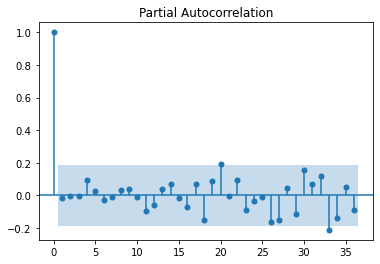

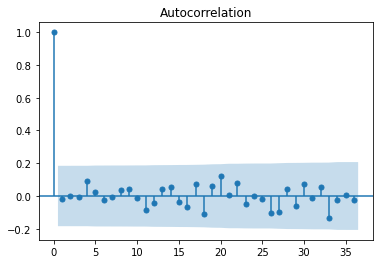

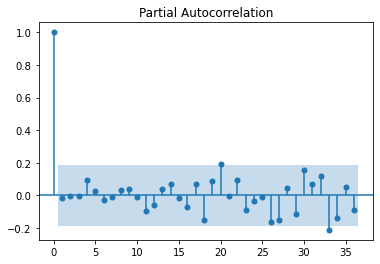

In [21]:
dtr = results.resid
sm.graphics.tsa.plot_acf(dtr.squeeze(),lags=36)
sm.graphics.tsa.plot_pacf(dtr.squeeze(),lags=36)

In [22]:
from scipy import stats
stats.describe(dtr)

DescribeResult(nobs=113, minmax=(-7.254783393877607, 11.5183532221989), mean=0.04792110343743104, variance=6.098915686575292, skewness=0.5873625711200787, kurtosis=3.853285721150856)

In [23]:
JB_resid= stats.jarque_bera(dtr)
JB_resid

Jarque_beraResult(statistic=76.4058446239956, pvalue=0.0)

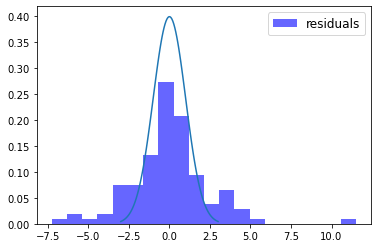

In [24]:
#Plot histogram for residuals
import math
plt.hist(dtr,bins=20,label='residuals', density=True, alpha=0.6, color='b')
plt.legend(loc='best', fontsize='large')
#plotting the normal distribution curve
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

# BDS

In [25]:
#computing the standardised residuals as residuals from ARMA(1,1) divided by std error of the model
import statistics
var= statistics.variance(results.resid)
se= var**0.5
std_res=results.resid/se

In [26]:
#Computing the BDS stats
import statsmodels.tsa.stattools as stat
bds = stat.bds(std_res,max_dim=2, epsilon=None, distance = 1.5)
print('bds_stat, pvalue:{}'.format(bds))

bds_stat, pvalue:(array(1.74252253), array(0.08141705))



# Forecasting 

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [58]:
data_insample =df[0:103].dropna()
data_outsample =df[103:113]
data_insample

,DATE,P,R,INF
1,1970-03-01,17.3,7.15,4.651215
2,1970-06-01,17.5,8.70,4.597752
3,1970-09-01,17.6,6.35,2.279208
4,1970-12-01,17.9,6.50,6.760724
5,1971-03-01,18.1,8.00,4.444490
...,...,...,...,...
98,1994-06-01,111.2,5.12,2.888099
99,1994-09-01,111.9,5.93,2.510093
100,1994-12-01,112.8,7.95,3.204289
101,1995-03-01,114.7,8.13,6.681474


C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


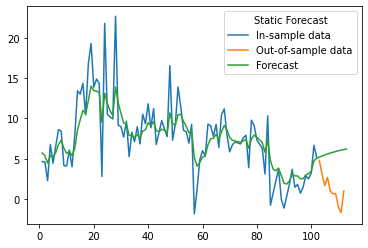

In [64]:
#Static forecast
model = ARIMA(endog=data_insample['INF'], order=(1, 0, 1))
results = model.fit()
pred = results.predict(1,113,dynamic=False)
plt.figure(1)
plt.plot(data_insample['INF'], label='In-sample data')
plt.plot(data_outsample['INF'],label='Out-of-sample data')
plt.plot(pred, label= 'Forecast')
plt.legend(title='Static Forecast')
plt.show()

C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


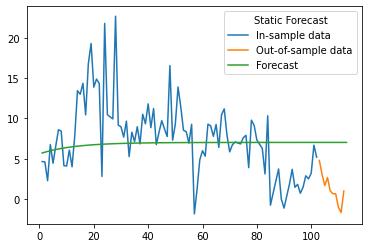

In [65]:
#Dynamic forecast
model = ARIMA(endog=data_insample['INF'], order=(1, 0, 1))
results = model.fit()
pred = results.predict(1,113,dynamic=True)
plt.figure(1)
plt.plot(data_insample['INF'], label='In-sample data')
plt.plot(data_outsample['INF'],label='Out-of-sample data')
plt.plot(pred, label= 'Forecast')
plt.legend(title='Static Forecast')
plt.show()

In [44]:
#RMSE
from sklearn.metrics import mean_squared_error 
pred_s= results.predict(57,169,dynamic =False)
stats_s= mean_squared_error(dt,pred_s)**0.5
print('root mean squared error for static forecast:{}'.format(stats_s))
pred_d= results.predict(57,169,dynamic =True)
stats_d= mean_squared_error(dt,pred_d)**0.5
print('root mean squared error for dynamic forecast:{}'.format(stats_d))

root mean squared error for static forecast:3.152233362355601
root mean squared error for dynamic forecast:3.1598960063100456


C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
